In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 코드실행 후 런타임 다시 시작해주기

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [2]:
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display

import warnings
warnings.filterwarnings("ignore")

In [4]:
batter_file_path = "/content/drive/MyDrive/python_data_analysis/data/batter_stats_2017.csv"

batter = pd.read_csv(batter_file_path)

# 1. 데이터 확인하기

In [5]:
batter.shape

(191, 21)

In [6]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

* 수치형: 경기, 타석, 타수, 안타, 홈런, 득점, 타점, 볼넷, 타율, 출루율, 장타율, 연봉(2018), 연봉(2017)

* 범주형: 선수명, 팀명

* 확인필요: BABIP, OPS, wOBA, WAR

In [7]:
batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    object 
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

* 수치형: 경기, 타석, 타수, 안타, 홈런, 득점, 타점, 볼넷, 타율, 출루율, 장타율, 연봉(2018), 연봉(2017) + BABIP, OPS, wOBA, WAR
    * 필요시 BABIP int로 바꾸기

* 범주형: 선수명, 팀명

In [8]:
display(batter.head(10))

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,107,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,82,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,64,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,116,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,96,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000
5,김선빈,KIA,137,529,476,176,5,84,64,39,40,4,0.393,0.370,0.420,0.477,0.897,0.391,5.19,28000,8000
6,버나디나,KIA,139,621,557,178,27,118,111,41,112,32,0.354,0.320,0.373,0.540,0.913,0.380,5.01,75000,75000
7,박민우,NC,106,452,388,141,3,84,47,46,51,11,0.408,0.363,0.441,0.472,0.913,0.404,4.92,32000,25000
8,김하성,넥센,141,601,526,159,23,90,114,58,65,16,0.306,0.302,0.376,0.513,0.889,0.375,4.76,32000,22000
9,스크럭스,NC,115,518,437,131,35,91,111,65,134,4,0.353,0.300,0.402,0.595,0.997,0.411,4.70,70000,80000


# 2. 회귀분석

## 1) 종속변수 설정: 연봉(2018)

### 연봉(2018) 살펴보기

In [9]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

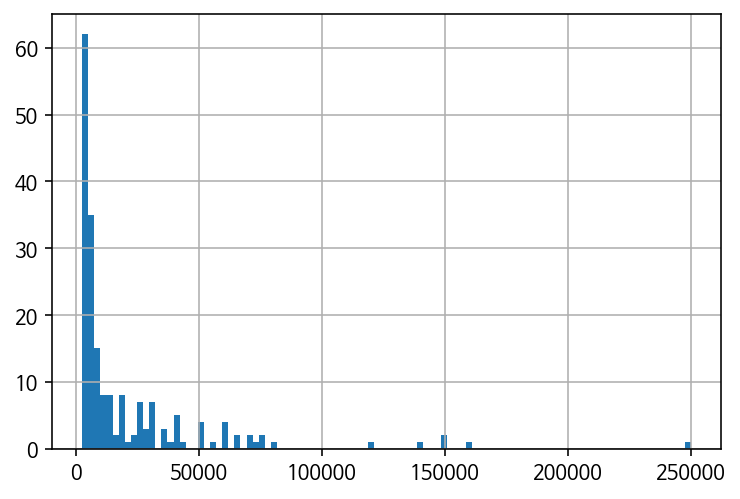

In [10]:
batter['연봉(2018)'].hist(bins=100)

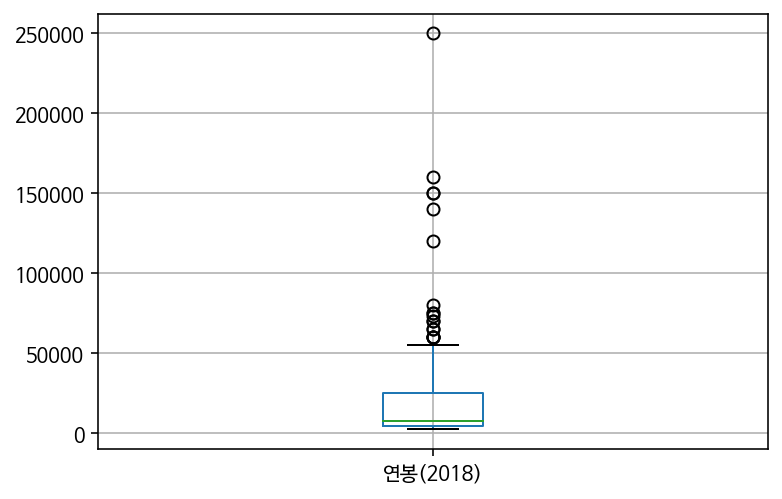

In [11]:
batter.boxplot(column=['연봉(2018)'])

## 2) 독립변수로 사용할 feature 준비하기 

### 수치형 feature: 단위 정규화

In [12]:
# 판다스 형태로 정의된 데이터 출력시 float으로 출력되도록 하기.
pd.options.mode.chained_assignment = None

In [13]:
def standard_scaling(df, scale_columns): 
    for col in scale_columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-mean)/std)
    return df

In [14]:
# BABIP dtype 바꿔주기
batter['BABIP'] = batter['BABIP'].replace({'-': 0})
batter['BABIP'] = batter['BABIP'].astype('float64')

batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    float64
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [15]:
scale_columns = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)']

batter_df = standard_scaling(batter, scale_columns)

display(batter_df.head(10))

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,-0.448042,0.112293,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,3.107502,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,-0.615839,0.467572,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,4.045622,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,2.740086,0.683829,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,0.512037,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,2.236697,0.861468,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,0.699661,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,3.579067,0.560253,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,4.045622,1.484672
5,김선빈,KIA,1.303394,1.444529,1.497383,2.074446,-0.158074,1.703964,1.050529,1.007335,-0.064878,0.055346,0.706999,1.171573,1.002746,0.753674,0.887465,0.905942,2.607381,0.230601,-0.359501
6,버나디나,KIA,1.347362,1.911958,1.965156,2.110922,2.406516,2.846154,2.538474,1.109785,2.111217,4.753641,0.405784,0.686044,0.587253,1.180488,0.950665,0.803637,2.500746,1.700322,1.808211
7,박민우,NC,0.621886,1.053311,0.989184,1.436118,-0.391219,1.703964,0.512336,1.365910,0.267581,1.229920,0.822851,1.103599,1.188391,0.719800,0.950665,1.026847,2.447428,0.355683,0.190515
8,김하성,넥센,1.391330,1.810343,1.786132,1.764401,1.940227,1.905527,2.633449,1.980610,0.690711,2.068901,0.035059,0.511254,0.613774,0.997568,0.855865,0.757134,2.352642,0.355683,0.093454
9,스크럭스,NC,0.819743,1.388640,1.272158,1.253739,3.339095,1.939120,2.538474,2.339185,2.776134,0.055346,0.398061,0.491833,0.843621,1.553104,1.282464,1.091950,2.317097,1.543969,1.969980


### 수치형 feature 시각화

In [16]:
def hist_each_features(df):
    plt.rcParams['figure.figsize'] = [18, 13]
    fig = plt.figure(1)

    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 4, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

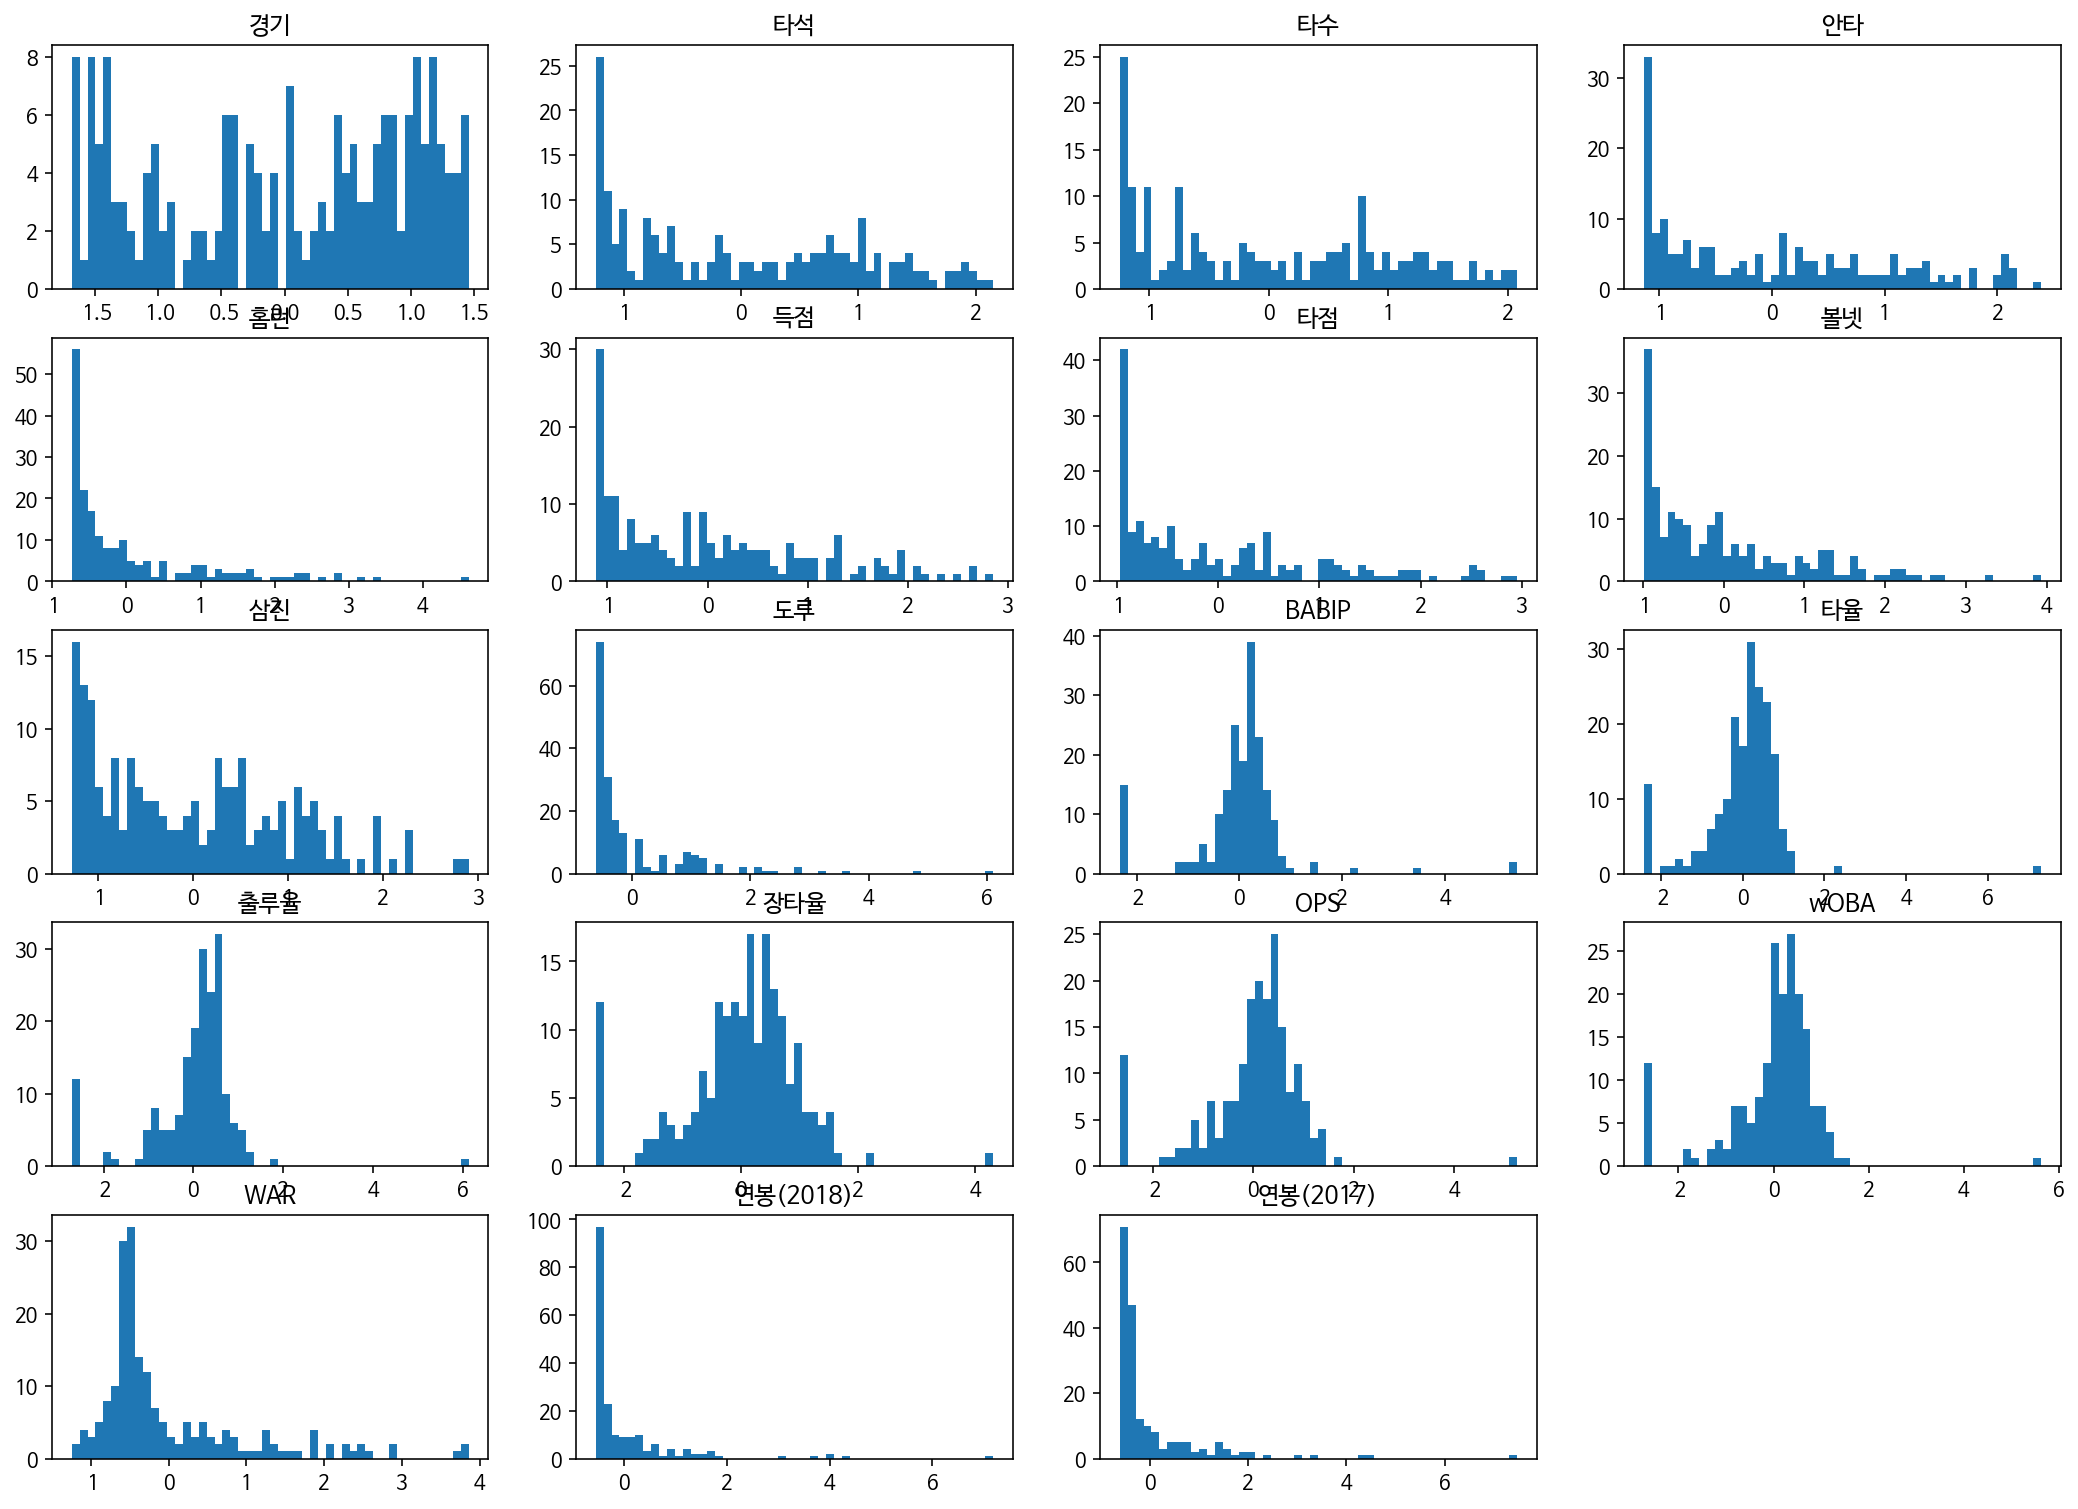

In [17]:
batter_numeric = batter_df[['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)']]

hist_each_features(batter_numeric)

### 범주형 feature: 원핫인코딩

In [18]:
team_encoding = pd.get_dummies(batter_df['팀명'])

batter_df = batter_df.drop('팀명', axis=1)
batter_df = batter_df.join(team_encoding)

display(batter_df.head(5))

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017),KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,-0.448042,0.112293,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,3.107502,3.264136,0,0,0,0,1,0,0,0,0,0
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,-0.615839,0.467572,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,4.045622,4.234754,1,0,0,0,0,0,0,0,0,0
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,2.740086,0.683829,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,0.512037,0.012569,0,0,0,0,0,0,1,0,0,0
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,2.236697,0.861468,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,0.699661,0.514054,0,0,0,1,0,0,0,0,0,0
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,3.579067,0.560253,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,4.045622,1.484672,0,0,0,0,0,0,0,1,0,0


### 다중공선성 확인하기
* VIF값이 10~15이면 다중공선성 문제 발생했다고 판단.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent = batter_df[batter_df.columns.difference(['선수명', 'y'])]

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(independent.values, i) for i in range(independent.shape[1])]
vif["features"] = independent.columns
vif.round(1)

,vif,features
0,6.0,BABIP
1,1.1,KIA
2,1.1,KT
3,1.2,LG
4,1.1,NC
5,inf,OPS
6,1.2,SK
7,21.5,WAR
8,2199.5,wOBA
9,14.4,경기


* 다중공선성 문제가 발생한 features: 경기, (삼진)
* 학습 후 결과가 좋지않으면 '경기' 제거해보기

## 3) train dataset, test dataset 준비하기

In [20]:
batter_df = batter_df.rename(columns={'연봉(2018)': 'y'})

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
X = batter_df[batter_df.columns.difference(['선수명', 'y'])]
y = batter_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(152, 28)
(39, 28)
(152,)
(39,)


## 4) 학습하기

In [24]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

## 5) 평가하기

### RMSE

In [25]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.23522191730654116
0.2632736156210497


### statsmodel의 summary()

In [26]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     81.69
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           4.42e-66
Time:                        09:58:41   Log-Likelihood:                 4.2997
No. Observations:                 152   AIC:                             45.40
Df Residuals:                     125   BIC:                             127.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.020      0.249      0.803      -0.035       0.045
BABIP          0.0140      0.060      0.234      0.815      -0.104       0.132
KIA           -0.0023      0.063     -0.037      0.971      -0.127       0.122
KT            -0.0652      0.065     -1.007      0.316      -0.193       0.063
LG            -0.0107      0.065     -0.163      0.871      -0.140       0.119
NC            -0.0965      0.064     -1.514      0.133      -0.223       0.030
OPS           -0.1059      0.335     -0.316      0.752      -0.769       0.557
SK            -0.1093      0.073     -1.497      0.137      -0.254       0.035
WAR            0.0335      0.098      0.342      0.733      -0.160       0.227
wOBA           0.2429      0.998      0.243      0.808      -1.732       2.218
경기             0.0995      0.088      1.134      0.259      -0.074       0.273
넥센            -0.0652      0.064     -1.025      0.307      -0.191       0.061
도루             0.0190      0.034      0.561      0.576      -0.048       0.086
두산             0.1140      0.083      1.382      0.169      -0.049       0.277
득점            -0.2210      0.109     -2.021      0.045      -0.437      -0.005
롯데             0.3107      0.078      3.993      0.000       0.157       0.465
볼넷             0.3153      0.115      2.752      0.007       0.089       0.542
삼성            -0.0378      0.080     -0.473      0.637      -0.196       0.120
삼진             0.0071      0.067      0.106      0.916      -0.126       0.141
안타             0.6766      0.352      1.925      0.057      -0.019       1.372
연봉(2017)       0.7752      0.032     24.600      0.000       0.713       0.838
장타율           -0.0550      0.204     -0.270      0.788      -0.459       0.349
출루율           -0.1651      0.507     -0.326      0.745      -1.169       0.838
타석            -1.7551      1.168     -1.502      0.135      -4.067       0.557
타수             1.1471      1.233      0.931      0.354      -1.292       3.587
타율             0.0078      0.151      0.051      0.959      -0.292       0.308
타점            -0.2567      0.126     -2.030      0.044      -0.507      -0.006
한화            -0.0327      0.063     -0.521      0.604      -0.157       0.092
홈런             0.2695      0.103      2.623      0.010       0.066       0.473
==============================================================================
Omnibus:                       80.405   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1848.870
Skew:                           1.283   Prob(JB):                         0.00
Kurtosis:                      19.892   Cond. No.                     5.05e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

1. R-squared & Adj.R-squared: 약간의 과적합이 의심됨 ---높을수록 좋으나 과적합 조심할 것.
2. F-값 p-value: 4.42e-66   ---0.05 미만이면 유의미
3. AIC:	45.40         ---작을수록 좋음
4. BIC:	127.0         ---작을수록 좋음
5. 유의미한 p-value를 가진 feature: 득점, 볼넷, 롯데, (안타), 연봉(2017), 타점, 홈런

* 다중공선성 문제가 발생한 features: 경기, (삼진)
* 학습 후 결과가 좋지않으면 '경기' 제거해보기

### coef 시각화하기: 막대그래프

[Text(0, 0, 'const'),
 Text(0, 0, 'BABIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'OPS'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'wOBA'),
 Text(0, 0, '경기'),
 Text(0, 0, '넥센'),
 Text(0, 0, '도루'),
 Text(0, 0, '두산'),
 Text(0, 0, '득점'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진'),
 Text(0, 0, '안타'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '장타율'),
 Text(0, 0, '출루율'),
 Text(0, 0, '타석'),
 Text(0, 0, '타수'),
 Text(0, 0, '타율'),
 Text(0, 0, '타점'),
 Text(0, 0, '한화'),
 Text(0, 0, '홈런')]

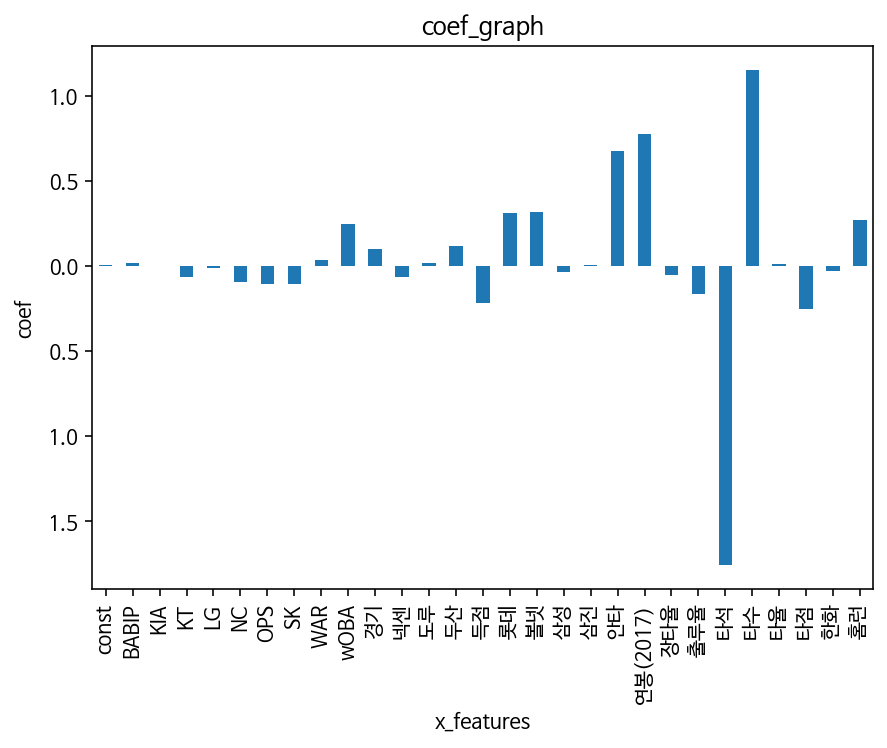

In [27]:
plt.rcParams['figure.figsize'] = [7, 5]

coef_list = model.params.tolist()
coef_series = pd.Series(coef_list)

x_labels = model.params.index.tolist()

ax = coef_series.plot(kind='bar')
ax.set_title('coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

### coef 시각화하기: heatmap

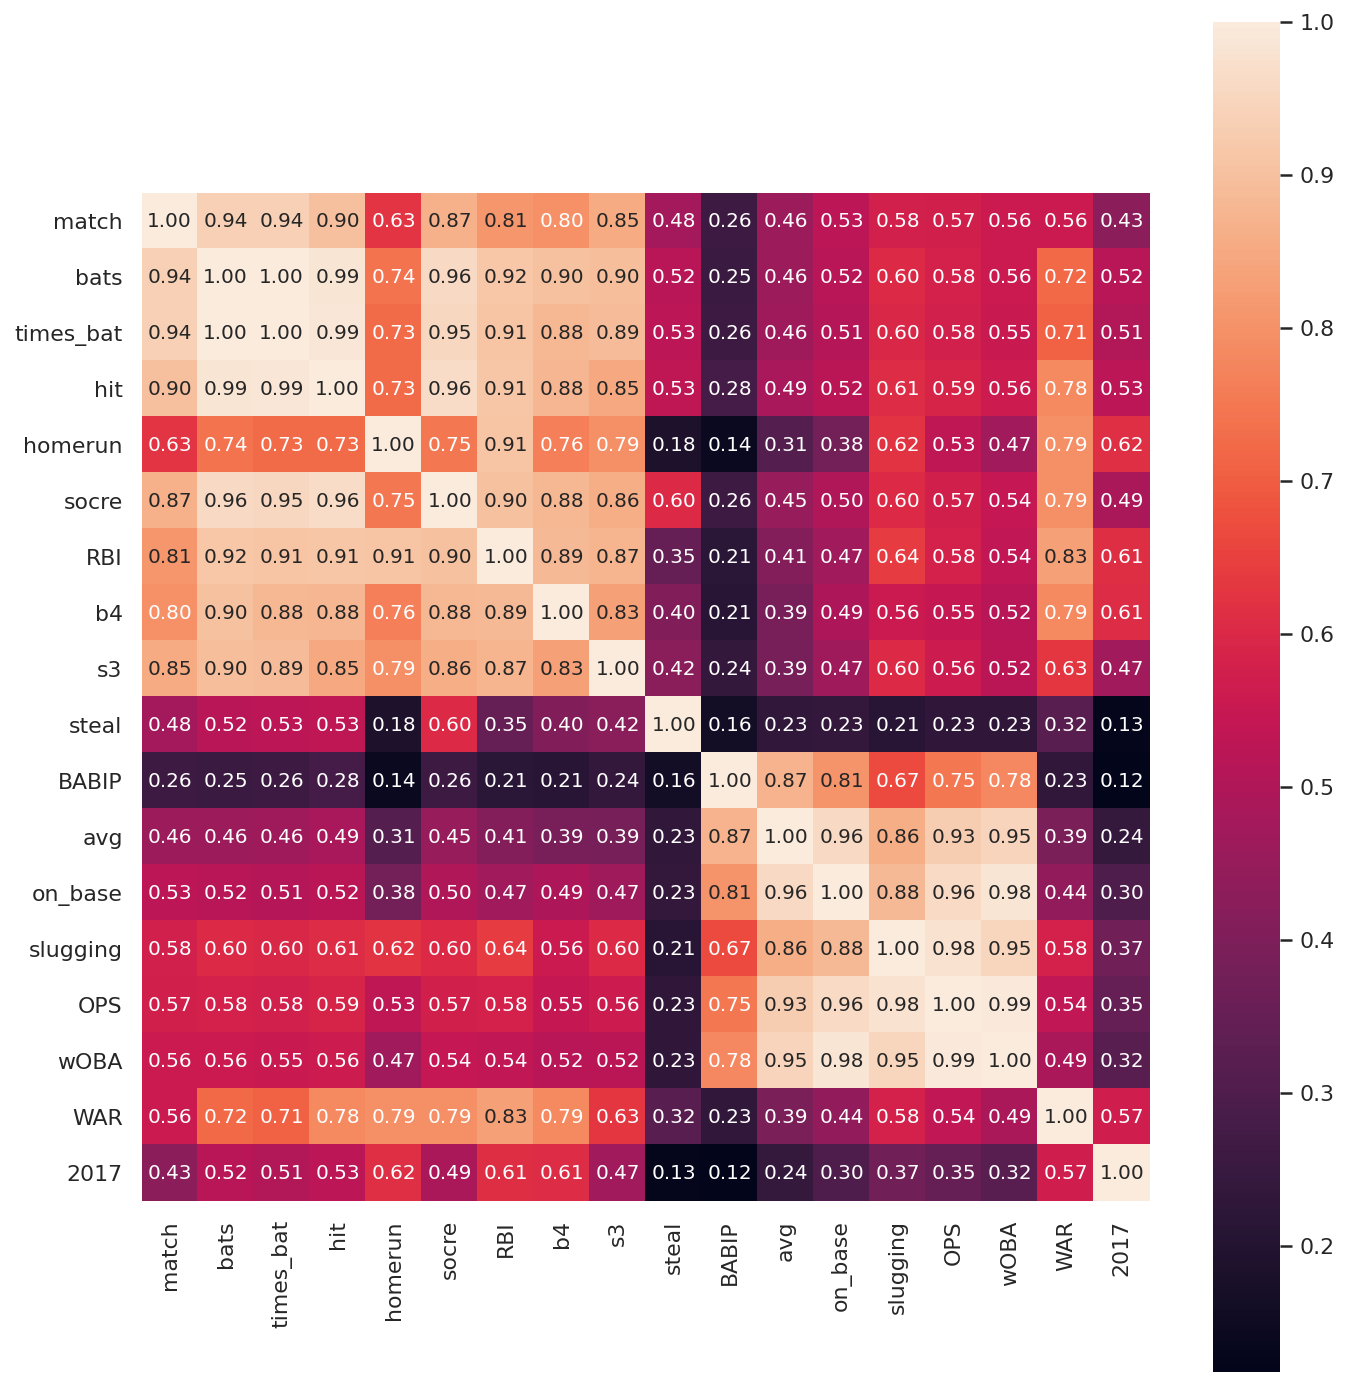

In [28]:
import seaborn as sns

scale_columns = ['경기',
 '타석',
 '타수',
 '안타',
 '홈런',
 '득점',
 '타점',
 '볼넷',
 '삼진',
 '도루',
 'BABIP',
 '타율',
 '출루율',
 '장타율',
 'OPS',
 'wOBA',
 'WAR',
 '연봉(2017)']
corr = batter_df[scale_columns].corr(method='pearson')
show_cols = ['match', 'bats', 'times_bat', 'hit', 'homerun', 'socre', 'RBI', 'b4', 's3', 'steal', 'BABIP', 'avg', 'on_base', 'slugging', 'OPS', 'wOBA', 'WAR', '2017']

plt.rc('font', family = 'NanumGothicOTF')
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(font_scale=1)
heat_map = sns.heatmap(corr.values, 
                       cbar = True,
                       annot = True,
                       square = True, 
                       fmt = '.2f',
                       annot_kws={'size': 10},
                       yticklabels=show_cols,
                       xticklabels=show_cols)

plt.tight_layout()
plt.show()

* 영향력이 강한 feature: 안타, 연봉(2017), 타석, 타수
* 유의미한 p-value를 가진 feature: 득점, 볼넷, 롯데, (안타), 연봉(2017), 타점, 홈런
* 다중공선성 문제가 발생한 features: 경기, (삼진)


* 학습 후 결과가 좋지않으면 '경기' 제거해보기

## 6) 적절한 feature 선정 후 재학습하기

In [29]:
X = batter_df[['안타', '홈런', '타석', '타수', '타점', '득점', '연봉(2017)']]
y = batter_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(152, 7)
(39, 7)
(152,)
(39,)


In [31]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

## 7) 재평가하기

In [32]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           8.55e-80
Time:                        09:58:44   Log-Likelihood:                -13.262
No. Observations:                 152   AIC:                             42.52
Df Residuals:                     144   BIC:                             66.72
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0074      0.022     -0.334      0.739      -0.051       0.036
안타             0.5895      0.179      3.289      0.001       0.235       0.944
홈런             0.1683      0.071      2.375      0.019       0.028       0.308
타석             0.8985      0.527      1.706      0.090      -0.142       1.939
타수            -1.2316      0.553     -2.228      0.027      -2.324      -0.139
타점            -0.1855      0.115     -1.608      0.110      -0.414       0.043
득점            -0.0488      0.085     -0.577      0.565      -0.216       0.118
연봉(2017)       0.8262      0.029     28.134      0.000       0.768       0.884
==============================================================================
Omnibus:                      139.539   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7196.448
Skew:                           2.726   Prob(JB):                         0.00
Kurtosis:                      36.265   Cond. No.                         81.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 이전 결과와 비교해보기: 
1. R-squared & Adj.R-squared: 스코어가 0.01 하락했지만 과적합 가능성이 낮아짐 
2. F-값 p-value: 4.42e-66 -> 8.55e-80  ---성능 향상
3. AIC:	45.40 -> 42.52                ---성능 향상
4. BIC:	127.0 -> 66.72                ---성능 향상

## 8) 최종시각화하기

In [33]:
X = batter_df[['안타', '홈런', '타석', '타수', '타점', '득점', '연봉(2017)']]
predict_2018 = lr.predict(X)
batter_df["예측연봉(2018)"] = pd.Series(predict_2018)
batter_df.head(5)

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017),KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화,예측연봉(2018)
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,-0.448042,0.112293,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,3.107502,3.264136,0,0,0,0,1,0,0,0,0,0,3.457967
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,-0.615839,0.467572,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,4.045622,4.234754,1,0,0,0,0,0,0,0,0,0,4.109809
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,2.740086,0.683829,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,0.512037,0.012569,0,0,0,0,0,0,1,0,0,0,0.600484
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,2.236697,0.861468,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,0.699661,0.514054,0,0,0,1,0,0,0,0,0,0,0.882801
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,3.579067,0.560253,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,4.045622,1.484672,0,0,0,0,0,0,0,1,0,0,1.845521


In [43]:
batter = pd.read_csv(batter_file_path)
batter = batter[['선수명', '연봉(2017)']]

final_df = batter_df.sort_values(by=['y'], ascending=False)
final_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
final_df = final_df.merge(batter, on=['선수명'], how='left')
final_df = final_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
final_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']
result_df = final_df.head(5)

In [44]:
result_df

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,이대호,7.172688,6.720596,250000
1,김태균,4.358328,4.054957,160000
2,최형우,4.045622,4.109809,150000
3,손아섭,4.045622,1.845521,65000
4,러프,3.732915,2.797228,110000


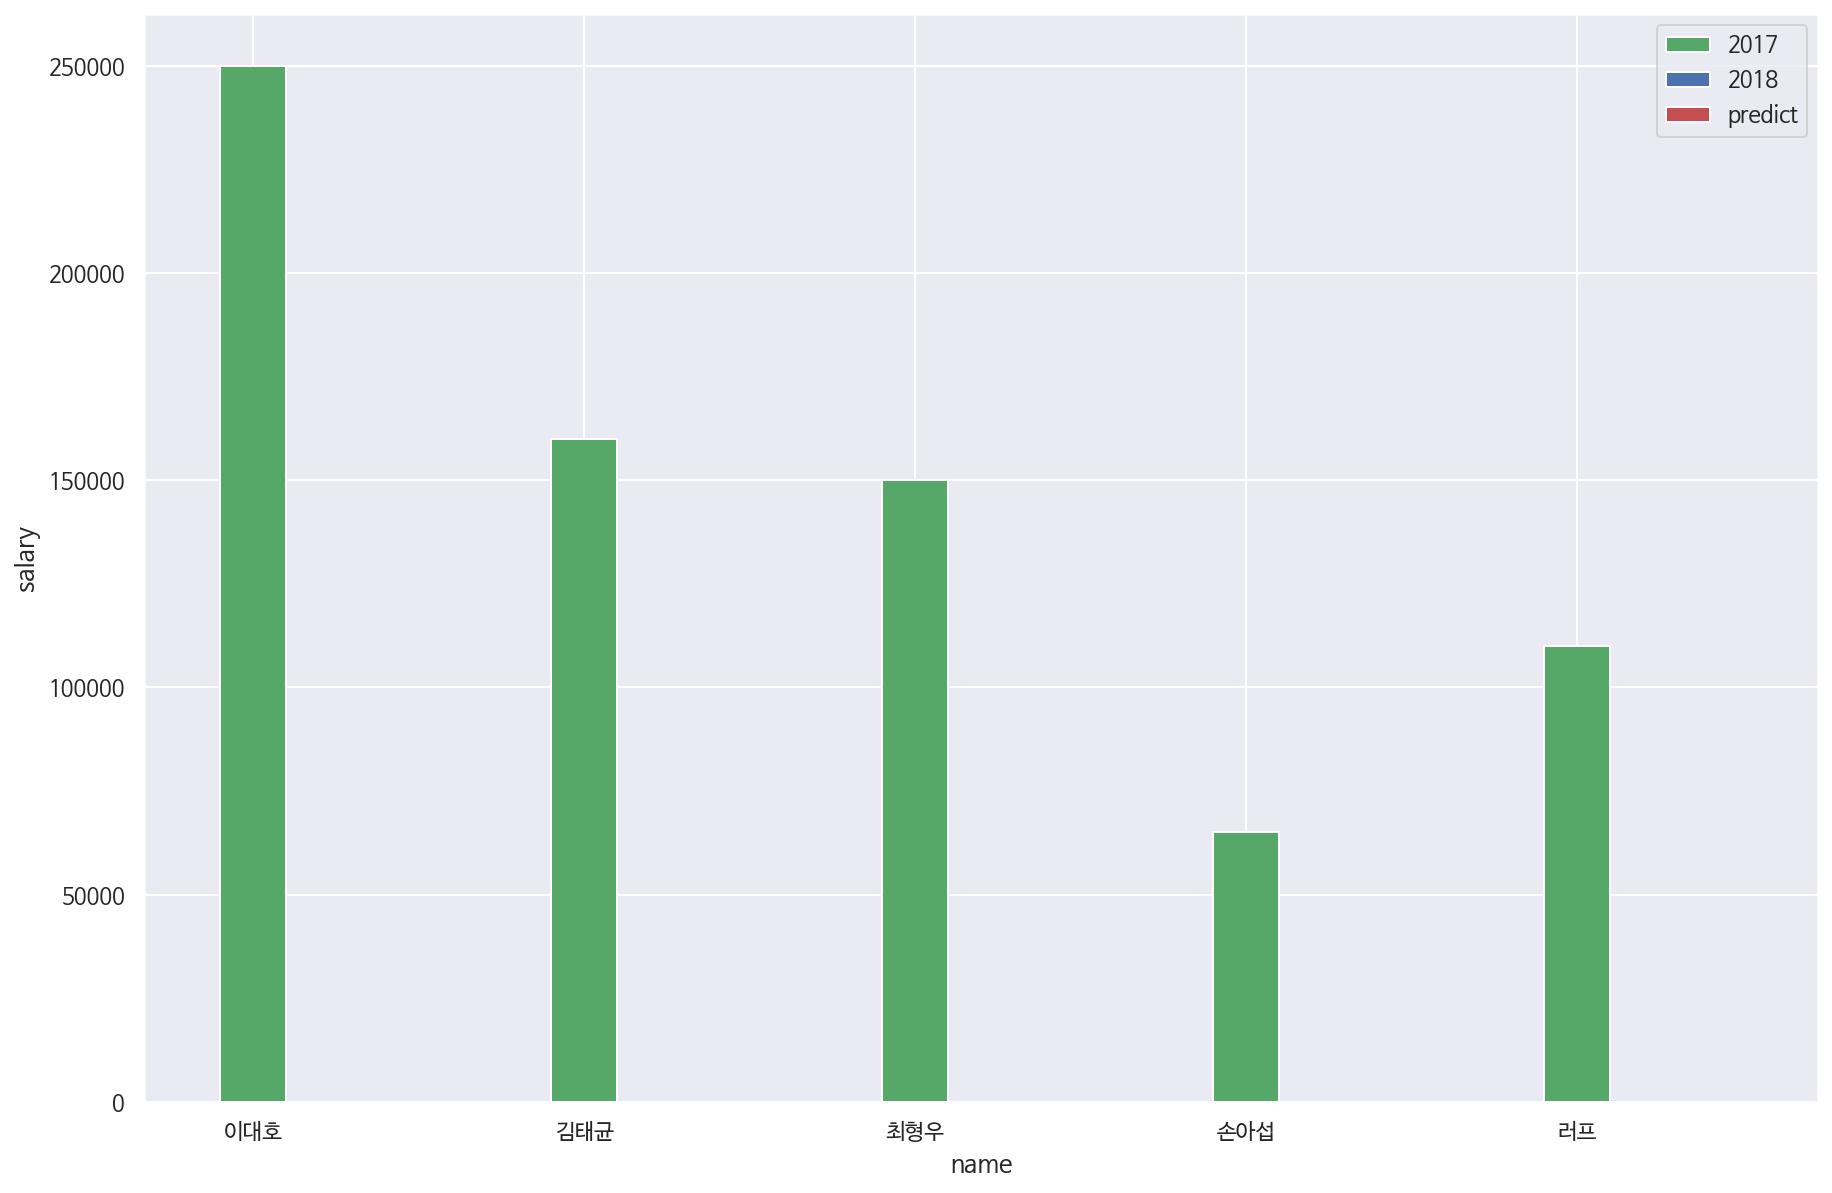

In [65]:
player_name = result_df['선수명'].tolist()
index = np.arange(len(player_name))

salary_2017 = result_df['작년연봉(2017)']
salary_2018 = result_df['실제연봉(2018)']
predict_2018 = result_df['예측연봉(2018)']

bar_width = 0.2

plt.bar(index, salary_2017, bar_width, color='g',label='2017')
plt.bar(index+bar_width, salary_2018, bar_width, color='b', label='2018')
plt.bar(index+bar_width*2, predict_2018, bar_width, color='r', label='predict')

plt.xticks(index, player_name)

plt.xlabel("name")
plt.ylabel("salary")
plt.legend()

plt.show()